#  Про Garbage collector и display в ноутбуках

## Quiz 1

In [1]:
a = [1, 2, 3]
b = a
del a
print(b)

[1, 2, 3]


## Quiz 2

In [2]:
a = [1, 2, 3]
b = a
b[0] = 10
print(a)

[10, 2, 3]


## Quiz end

In [64]:
a = [1, 2, 3]

In [65]:
a

[1, 2, 3]

In [6]:
a = a[:2]

In [7]:
a

[1, 2]

In [8]:
print(a)

[1, 2]


In [9]:
display(a)

[1, 2]

Возьмем популярный датасет с kaggle - [задача предсказания стоимости дома](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

In [10]:
# Скачаем наш датасет house_prices.csv
!gdown 1RtXyuP27pffnvyvKNT6kT8_4KnniShvN

zsh:1: command not found: gdown


Расширение .csv означает comma separated values, то есть данные разделённые запятой.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Считаем наш csv датасет
df = pd.read_csv('./house_prices.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Моделирование

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

In [16]:
train, test = train_test_split(df, test_size=0.3, random_state=43)

In [17]:
target_col = 'SalePrice'

## Наивное Решение

In [18]:
mean_model = train[target_col].mean()
mean_model

np.float64(180580.43444227005)

In [19]:
train['naive_predict'] = mean_model
test['naive_predict'] = mean_model

In [20]:
train_mse = mean_squared_error(train[target_col], train['naive_predict'])**0.5
test_mse = mean_squared_error(test[target_col], test['naive_predict'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

78307 81945 104.65%


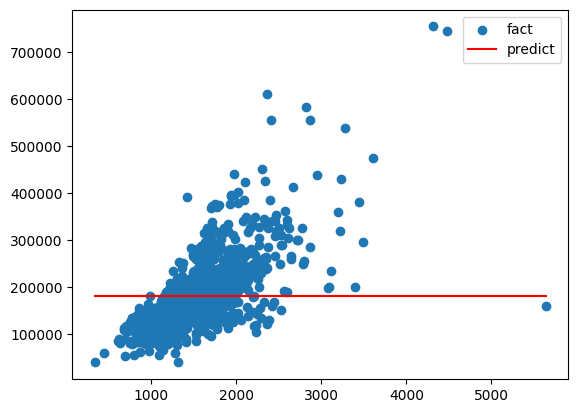

In [21]:
plt.scatter(train['GrLivArea'], train[target_col], label='fact')
plt.plot(train['GrLivArea'], train['naive_predict'], label='predict', c='red')
plt.legend()
plt.show()

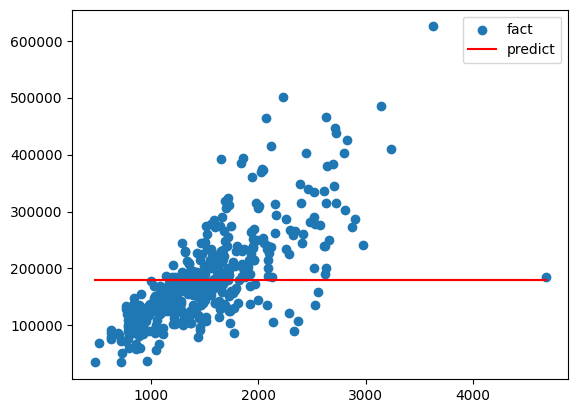

In [22]:
plt.scatter(test['GrLivArea'], test[target_col], label='fact')
plt.plot(test['GrLivArea'], test['naive_predict'], label='predict', c='red')
plt.legend()
plt.show()

Попробуем отрисовать зависимость от другого фактора

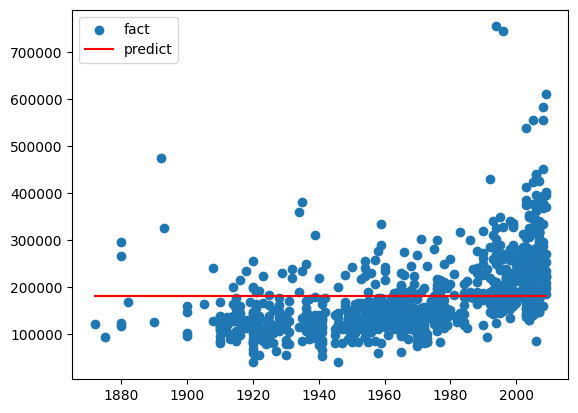

In [23]:
plt.scatter(train['YearBuilt'], train[target_col], label='fact')
plt.plot(train['YearBuilt'], train['naive_predict'], label='predict', c='red')
plt.legend()
plt.show()

## Простая одномерная ручная регрессия

y = a*GrLivArea + b

In [24]:
a = 117
b = 0

train['simple_predict'] = train['GrLivArea'] * a + b
test['simple_predict'] = test['GrLivArea'] * a + b

train_mse = mean_squared_error(train[target_col], train['simple_predict'])**0.5
test_mse = mean_squared_error(test[target_col], test['simple_predict'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

56525 56072 99.2%


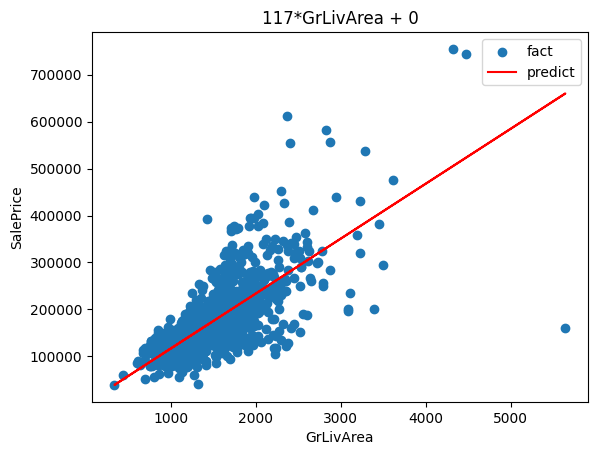

In [25]:
plt.scatter(train['GrLivArea'], train[target_col], label='fact')
plt.plot(train['GrLivArea'], train['simple_predict'], label='predict', c='red')
plt.title(f'{a}*GrLivArea + {b}')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

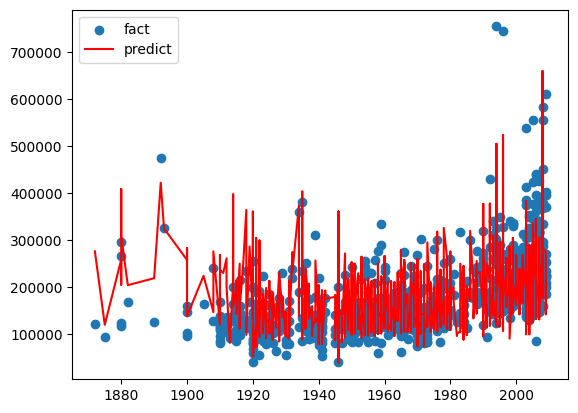

In [26]:
plt.scatter(train['YearBuilt'], train[target_col], label='fact')
tmp = train[['YearBuilt', 'simple_predict']].sort_values('YearBuilt')
plt.plot(tmp['YearBuilt'], tmp['simple_predict'], label='predict', c='red')
plt.legend()
plt.show()

In [27]:
train['year_5'] = train['YearBuilt'] // 5 * 5

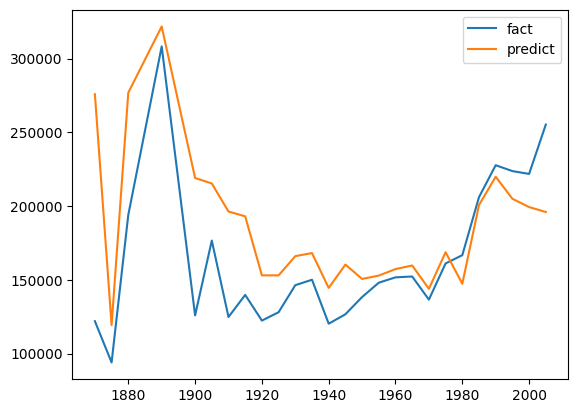

In [28]:
agg = train.groupby('year_5', as_index=False)[['simple_predict', target_col]].mean()
plt.plot(agg['year_5'], agg[target_col], label='fact')
plt.plot(agg['year_5'], agg['simple_predict'], label='predict')
plt.legend()
plt.show()

<Axes: xlabel='year_5'>

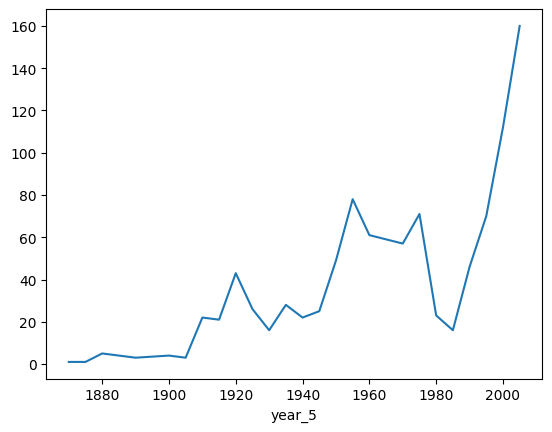

In [29]:
train.groupby('year_5', as_index=True).size().plot()

## Одномерный метод наименьших квадратов

In [30]:
def least_squared_estimator(X, y, learn_intercept=False):
  X = np.array(X)
  if learn_intercept:
    X = np.concatenate([np.ones((X.shape[0], 1), ), X ], axis=1)
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
  return coefs

In [31]:
least_squared_estimator(train[['GrLivArea']], train[target_col], True)

array([20148.93388376,   105.96148907])

In [32]:
a = 105.96148907
b = 20148.93388376
train['simple_predict_v2'] = train['GrLivArea'] * a + b
test['simple_predict_v2'] = test['GrLivArea'] * a + b

train_mse = mean_squared_error(train[target_col], train['simple_predict_v2'])**0.5
test_mse = mean_squared_error(test[target_col], test['simple_predict_v2'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

56133 55816 99.43%


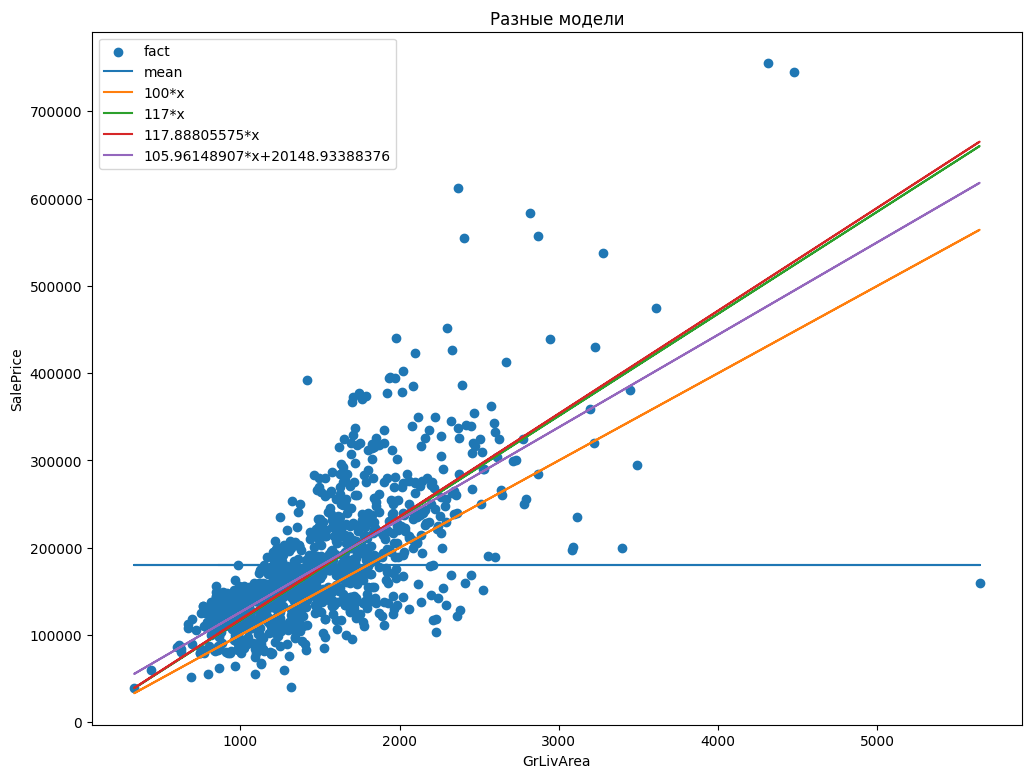

In [33]:
plt.figure(figsize=(12,9))
plt.scatter(train['GrLivArea'], train[target_col], label='fact')
plt.plot(train['GrLivArea'], train['naive_predict'], label='mean',)
plt.plot(train['GrLivArea'], 100*train['GrLivArea'], label='100*x')
plt.plot(train['GrLivArea'], 117*train['GrLivArea'], label='117*x')
plt.plot(train['GrLivArea'], 117.88805575*train['GrLivArea'], label='117.88805575*x')
plt.plot(train['GrLivArea'], 105.96148907*train['GrLivArea']+20148.93388376, label='105.96148907*x+20148.93388376')
plt.title(f'Разные модели')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

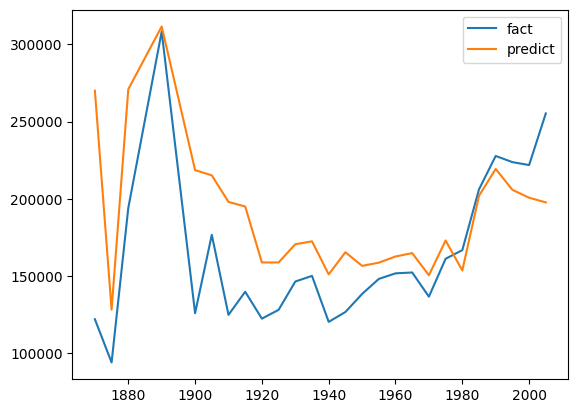

In [34]:
agg = train.groupby('year_5', as_index=False)[['simple_predict_v2', target_col]].mean()
plt.plot(agg['year_5'], agg[target_col], label='fact')
plt.plot(agg['year_5'], agg['simple_predict_v2'], label='predict')
plt.legend()
plt.show()

## Многомерная Регрессия

## Коллиниарность

### Playground

In [35]:
train['GrLivArea_twin'] = train['GrLivArea'] + np.random.rand(train.shape[0])
test['GrLivArea_twin'] = test['GrLivArea'] + np.random.rand(test.shape[0]) * 20

coefs = least_squared_estimator(train[['GrLivArea', 'GrLivArea_twin']], train[target_col], True)
coefs

/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/243984020.py:5: RuntimeWarning: divide by zero encountered in matmul
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/243984020.py:5: RuntimeWarning: overflow encountered in matmul
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/243984020.py:5: RuntimeWarning: invalid value encountered in matmul
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y


array([20597.32150332,  1002.72063298,  -896.77640243])

In [36]:
20 * 7006.86880343

140137.37606860002

In [37]:
coefs[1] + coefs[2]

np.float64(105.94423055488551)

In [38]:
a1 = coefs[1]
a2 = coefs[2]
b = coefs[0]

train['simple_predict_v3'] = train['GrLivArea'] * a1 + train['GrLivArea_twin'] * a2 + b
test['simple_predict_v3'] = test['GrLivArea'] * a1 + test['GrLivArea_twin'] * a2 +b

train_mse = mean_squared_error(train[target_col], train['simple_predict_v3'])**0.5
test_mse = mean_squared_error(test[target_col], test['simple_predict_v3'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

56132 56732 101.07%


In [39]:
train['simple_predict_v3'].mean(), test['simple_predict_v3'].mean(), train['simple_predict_v3'].mean() - test['simple_predict_v3'].mean()

(np.float64(180580.43464672932),
 np.float64(172505.1100162346),
 np.float64(8075.324630494724))

### Регуляризация

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1000000000000)
en = ElasticNet(alpha=200, l1_ratio=0.9)

lr.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])
lasso.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])
ridge.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])
en.fit(train[['GrLivArea', 'GrLivArea_twin']], train[target_col])

/Users/albertzagibin/Documents/University/ML/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.606e+12, tolerance: 6.267e+08
  model = cd_fast.enet_coordinate_descent(
/Users/albertzagibin/Documents/University/ML/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.264e+12, tolerance: 6.267e+08
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=200, l1_ratio=0.9)

In [41]:
lr.coef_, lr.intercept_

(array([1002.7206349 , -896.77640443]), np.float64(20597.321421886998))

In [42]:
lasso.coef_, lasso.intercept_

(array([106.23473425,  -0.2735243 ]), np.float64(20149.48527549085))

In [43]:
ridge.coef_, ridge.intercept_

(array([0.02873682, 0.02873619]), np.float64(180493.40361973824))

In [44]:
en.coef_, en.intercept_

(array([98.80665128,  7.15348213]), np.float64(20147.618131687894))

## Категориальные

### Playground

<Axes: xlabel='Neighborhood'>

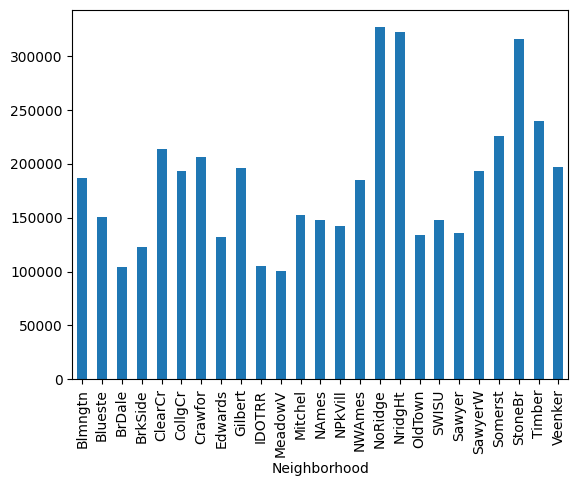

In [45]:
train.groupby(['Neighborhood'])[target_col].mean().plot(kind='bar')

In [46]:
cat_col = 'Neighborhood'

### OHE (One Hot Encoding)

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
ohe = OneHotEncoder()

ohe.fit(train[[cat_col]])

OneHotEncoder()

In [49]:
train_X = ohe.transform(train[[cat_col]])
test_X = ohe.transform(test[[cat_col]])

In [50]:
display(train_X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1022 stored elements and shape (1022, 25)>

In [51]:
display(train_X.todense().sum(axis=0))

matrix([[ 13.,   1.,  11.,  40.,  20., 100.,  37.,  75.,  62.,  28.,
           9.,  30., 158.,   9.,  47.,  27.,  55.,  79.,  18.,  57.,
          39.,  57.,  17.,  27.,   6.]])

In [52]:
X_train_cat = train_X.todense()

In [53]:
X_train_cat.shape

(1022, 25)

In [54]:
X_train_new = np.concatenate([train[['GrLivArea']].values, X_train_cat ], axis=1)
X_train_new = X_train_cat

In [55]:
# display(X_train_new)

In [56]:
coefs = least_squared_estimator(X_train_new, train[target_col])
coefs

/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/243984020.py:5: RuntimeWarning: divide by zero encountered in matmul
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/243984020.py:5: RuntimeWarning: overflow encountered in matmul
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y
/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/243984020.py:5: RuntimeWarning: invalid value encountered in matmul
  coefs = np.linalg.inv(X.T @ X) @ X.T @ y


array([186386.61538462, 151000.        , 103990.90909091, 122647.5       ,
       213771.6       , 193079.85      , 206629.37837838, 131797.6       ,
       195629.69354839, 105602.71428571, 100600.        , 152867.86666667,
       147616.99367089, 142694.44444444, 184940.42553191, 326513.25925926,
       322309.67272727, 134225.74683544, 147491.66666667, 135654.24561404,
       193343.38461538, 225363.36842105, 315835.64705882, 239458.88888889,
       197333.33333333])

In [57]:
train['preds_cat_v2'] = (X_train_new @ coefs).T

/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/1273697371.py:1: RuntimeWarning: divide by zero encountered in matmul
  train['preds_cat_v2'] = (X_train_new @ coefs).T
/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/1273697371.py:1: RuntimeWarning: overflow encountered in matmul
  train['preds_cat_v2'] = (X_train_new @ coefs).T
/var/folders/_p/8krn6b1j21bbrx339d1x74z80000gn/T/ipykernel_69031/1273697371.py:1: RuntimeWarning: invalid value encountered in matmul
  train['preds_cat_v2'] = (X_train_new @ coefs).T


In [58]:
# train['preds_cat'].value_counts()

In [59]:
train.groupby(['Neighborhood'])[[target_col, 'simple_predict_v3', 'preds_cat', 'preds_cat_v2']].mean()

KeyError: "Columns not found: 'preds_cat'"

In [ ]:
326513.259259 / 103990.909091

3.13982503002523

In [60]:
train_mse = mean_squared_error(train[target_col], train['preds_cat'])**0.5
print(round(train_mse))

KeyError: 'preds_cat'

In [ ]:
train_mse = mean_squared_error(train[target_col], train['preds_cat_v2'])**0.5
print(round(train_mse))

53055


In [ ]:
train['preds_cat_v2'].nunique()

25

### Label Encoding

In [ ]:
cat_mapping = {}
for i, cat in enumerate(train[cat_col].unique()):
  cat_mapping[cat] = i

In [ ]:
cat_mapping

{'NAmes': 0,
 'Edwards': 1,
 'IDOTRR': 2,
 'CollgCr': 3,
 'NWAmes': 4,
 'BrkSide': 5,
 'Crawfor': 6,
 'Somerst': 7,
 'StoneBr': 8,
 'SWISU': 9,
 'NridgHt': 10,
 'NoRidge': 11,
 'SawyerW': 12,
 'ClearCr': 13,
 'Gilbert': 14,
 'Sawyer': 15,
 'Mitchel': 16,
 'OldTown': 17,
 'Blmngtn': 18,
 'Timber': 19,
 'NPkVill': 20,
 'Veenker': 21,
 'Blueste': 22,
 'BrDale': 23,
 'MeadowV': 24}

In [ ]:
train['cat_col'] = train[cat_col].apply(lambda x: cat_mapping[x])
test['cat_col'] = test[cat_col].apply(lambda x: cat_mapping[x])

In [ ]:
least_squared_estimator(train[['cat_col']], train[target_col], learn_intercept=False)

array([13662.98650975])

In [ ]:
train['cat_predict_le'] = 13662.98650975 * train['cat_col']
test['cat_predict_le'] = 13662.98650975 * test['cat_col']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['cat_predict_le'])**0.5
test_mse = mean_squared_error(test[target_col], test['cat_predict_le'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

133549 138157 103.45%


In [ ]:
cat_mapping = {}
for i, cat in enumerate(train.groupby([cat_col], as_index=False)[target_col].mean().sort_values(target_col)[cat_col]):
  cat_mapping[cat] = i

In [ ]:
cat_mapping

{'MeadowV': 0,
 'BrDale': 1,
 'IDOTRR': 2,
 'BrkSide': 3,
 'Edwards': 4,
 'OldTown': 5,
 'Sawyer': 6,
 'NPkVill': 7,
 'SWISU': 8,
 'NAmes': 9,
 'Blueste': 10,
 'Mitchel': 11,
 'NWAmes': 12,
 'Blmngtn': 13,
 'CollgCr': 14,
 'SawyerW': 15,
 'Gilbert': 16,
 'Veenker': 17,
 'Crawfor': 18,
 'ClearCr': 19,
 'Somerst': 20,
 'Timber': 21,
 'StoneBr': 22,
 'NridgHt': 23,
 'NoRidge': 24}

In [ ]:
train['cat_col'] = train[cat_col].apply(lambda x: cat_mapping[x])
test['cat_col'] = test[cat_col].apply(lambda x: cat_mapping[x])

In [ ]:
least_squared_estimator(train[['cat_col']], train[target_col], learn_intercept=False)

array([13661.91506572])

In [ ]:
train['cat_predict_le'] = 13661.91506572 * train['cat_col']
test['cat_predict_le'] = 13661.91506572 * test['cat_col']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['cat_predict_le'])**0.5
test_mse = mean_squared_error(test[target_col], test['cat_predict_le'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

69650 67537 96.97%


### Mean Target Encoding

In [ ]:
cat_mapping = {}
for i, cat in train.groupby([cat_col], as_index=False)[target_col].mean().sort_values(target_col).iterrows():
  cat_mapping[cat[cat_col]] = cat[target_col]

In [ ]:
cat_mapping

{'MeadowV': 100600.0,
 'BrDale': 103990.90909090909,
 'IDOTRR': 105602.71428571429,
 'BrkSide': 122647.5,
 'Edwards': 131797.6,
 'OldTown': 134225.74683544305,
 'Sawyer': 135654.24561403508,
 'NPkVill': 142694.44444444444,
 'SWISU': 147491.66666666666,
 'NAmes': 147616.99367088606,
 'Blueste': 151000.0,
 'Mitchel': 152867.86666666667,
 'NWAmes': 184940.4255319149,
 'Blmngtn': 186386.61538461538,
 'CollgCr': 193079.85,
 'SawyerW': 193343.38461538462,
 'Gilbert': 195629.6935483871,
 'Veenker': 197333.33333333334,
 'Crawfor': 206629.37837837837,
 'ClearCr': 213771.6,
 'Somerst': 225363.36842105264,
 'Timber': 239458.88888888888,
 'StoneBr': 315835.64705882355,
 'NridgHt': 322309.67272727273,
 'NoRidge': 326513.25925925927}

In [ ]:
train['cat_col'] = train[cat_col].apply(lambda x: cat_mapping[x])
test['cat_col'] = test[cat_col].apply(lambda x: cat_mapping[x])

In [ ]:
least_squared_estimator(train[['cat_col']], train[target_col], learn_intercept=False)

array([1.])

In [ ]:
train['cat_predict_mte'] = 1 * train['cat_col']
test['cat_predict_mte'] = 1 * test['cat_col']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['cat_predict_mte'])**0.5
test_mse = mean_squared_error(test[target_col], test['cat_predict_mte'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

53055 55575 104.75%


In [ ]:
X_train_cat = train[['cat_col']]

In [ ]:
X_train_new = np.concatenate([train[['GrLivArea']].values, X_train_cat ], axis=1)

In [ ]:
coefs = least_squared_estimator(X_train_new, train[target_col], learn_intercept=False)
coefs

array([55.0267417 ,  0.56102902])

In [ ]:
train['predict_mte'] = X_train_new @ coefs

In [ ]:
train_mse = mean_squared_error(train[target_col], train['predict_mte'])**0.5
train_mse

44638.675126352064

In [ ]:
train.groupby(['Neighborhood'])[[target_col, 'simple_predict_v3', 'preds_cat', 'preds_cat_v2', 'predict_mte']].mean()

,SalePrice,simple_predict_v3,preds_cat,preds_cat_v2,predict_mte
Neighborhood,,,,,
Blmngtn,186386.615385,168931.052668,186386.615385,186386.615385,182282.990753
Blueste,151000.000000,187799.825964,151000.000000,151000.000000,170336.992101
BrDale,103990.909091,142917.039905,103990.909091,103990.909091,121897.804477
BrkSide,122647.500000,146382.084659,122647.500000,122647.500000,134472.217598
ClearCr,213771.600000,203968.305679,213771.600000,213771.600000,215150.345086
CollgCr,193079.850000,173535.813498,193079.850000,193079.850000,187929.485707
Crawfor,206629.378378,206703.116967,206629.378378,206629.378378,212757.270950
Edwards,131797.600000,160443.086335,131797.600000,131797.600000,146807.956032
Gilbert,195629.693548,195124.939948,195629.693548,195629.693548,200720.239505


## Пропуски в даннных

### Playground

In [ ]:
train['LotFrontage_isna'] = train['LotFrontage'].isna().astype(int)
test['LotFrontage_isna'] = test['LotFrontage'].isna().astype(int)
train.groupby(['LotFrontage_isna'])[target_col].mean()

,SalePrice
LotFrontage_isna,
0,181267.457346
1,177322.865169


In [ ]:
181267.457346 - 177322.865169

3944.592177000013

In [ ]:
train['LotFrontage_isna'].mean()

np.float64(0.17416829745596868)

In [ ]:
least_squared_estimator(train[['LotFrontage']], train[target_col])

array([nan])

In [ ]:
train['LotFrontage'].mean()

np.float64(70.37322274881517)

In [ ]:
test['LotFrontage'].mean()

np.float64(69.28571428571429)

In [ ]:
train['LotFrontage_filled'] = train['LotFrontage'].fillna(70.37322274881517)
test['LotFrontage_filled'] = test['LotFrontage'].fillna(70.37322274881517)

In [ ]:
least_squared_estimator(train[['LotFrontage_filled']], train[target_col], learn_intercept=True)

array([99027.90172795,  1158.85743936])

In [ ]:
train['nan_predicts'] = 99027.90172795 + 1158.85743936 * train['LotFrontage_filled']
test['nan_predicts'] = 99027.90172795 + 1158.85743936 * test['LotFrontage_filled']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['nan_predicts'])**0.5
test_mse = mean_squared_error(test[target_col], test['nan_predicts'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

73751 77319 104.84%


In [ ]:
least_squared_estimator(train[['LotFrontage_filled', 'LotFrontage_isna']], train[target_col], learn_intercept=True)

array([99714.92463165,  1158.85743936, -3944.59217743])

In [ ]:
train['nan_predicts_v2'] = 99714.92463165 + 1158.85743936 * train['LotFrontage_filled'] - 3944.59217743 * train['LotFrontage_isna']
test['nan_predicts_v2'] = 99714.92463165 + 1158.85743936 * test['LotFrontage_filled'] - 3944.59217743 * test['LotFrontage_isna']

In [ ]:
train_mse = mean_squared_error(train[target_col], train['nan_predicts_v2'])**0.5
test_mse = mean_squared_error(test[target_col], test['nan_predicts_v2'])**0.5
print(round(train_mse), round(test_mse), f'{round(test_mse/train_mse * 100, 2)}%')

73736 77414 104.99%


## Скейлинг

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [62]:
X_train = train[['LotFrontage_filled', 'LotArea']]
X_test = test[['LotFrontage_filled', 'LotArea']]

KeyError: "['LotFrontage_filled'] not in index"

In [ ]:
least_squared_estimator(X_train, train[target_col], learn_intercept=True)

array([9.64366665e+04, 9.91784600e+02, 1.37929158e+00])

In [ ]:
sc.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
display(X_train_scaled)

array([[-0.0164329 , -0.13970768],
       [ 0.20371584, -0.06196966],
       [ 0.42386459, -0.19911024],
       ...,
       [ 3.06564958,  0.93661531],
       [-0.1925519 , -0.17852307],
       [ 0.64401334,  0.07506369]])

In [ ]:
least_squared_estimator(X_train_scaled, train[target_col], learn_intercept=True)

array([180580.43444227,  22525.3289786 ,  12863.54475894])

## Полиномиальная регрессия

In [ ]:
xs = np.linspace(-50, 50, 1000)
ys = xs**2 * (1 + np.random.rand(xs.shape[0]) / 5 - 0.1)

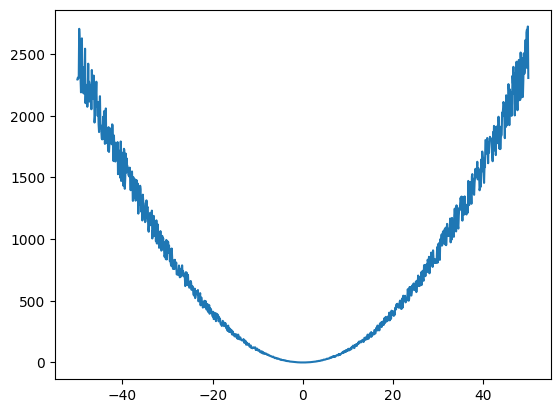

In [ ]:
plt.plot(xs, ys)

In [ ]:
least_squared_estimator(xs.reshape(-1, 1), ys, learn_intercept=True)

array([8.34771268e+02, 1.84736237e-01])

In [ ]:
preds = xs* 6.27497634e-02 + 8.32747634e+02

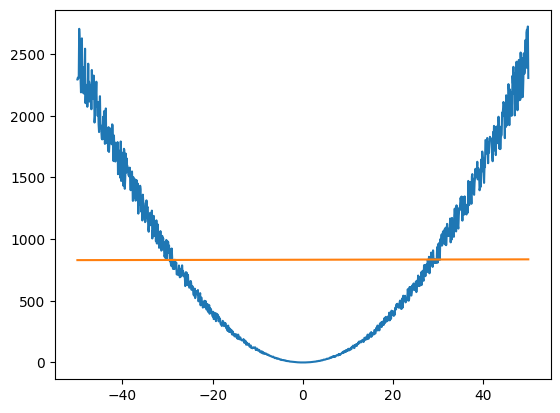

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, preds)

In [ ]:
least_squared_estimator(xs.reshape(-1, 1)**2, ys, learn_intercept=True)

array([2.53926302, 0.99668304])

In [ ]:
preds = xs**2*0.99994969 - 2.21202444

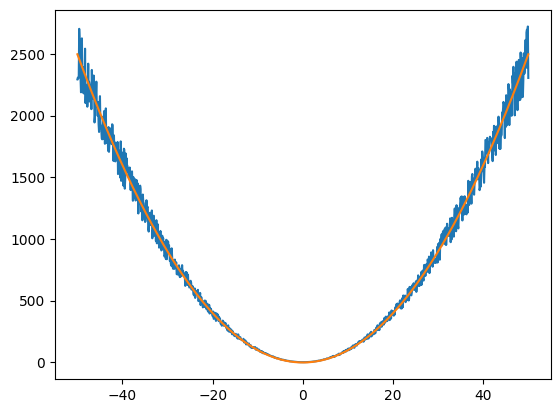

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, preds)

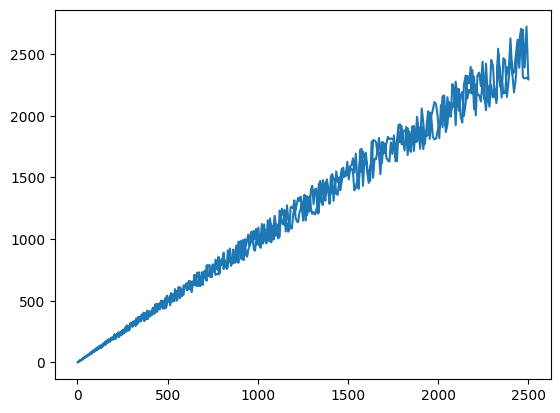

In [ ]:
plt.plot(xs**2, ys)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly.fit(xs.reshape(-1, 1))

xs_transformed = poly.transform(xs.reshape(-1, 1))
display(xs_transformed)

array([[-5.00000000e+01,  2.50000000e+03, -1.25000000e+05],
       [-4.98998999e+01,  2.49000001e+03, -1.24250751e+05],
       [-4.97997998e+01,  2.48002006e+03, -1.23504502e+05],
       ...,
       [ 4.97997998e+01,  2.48002006e+03,  1.23504502e+05],
       [ 4.98998999e+01,  2.49000001e+03,  1.24250751e+05],
       [ 5.00000000e+01,  2.50000000e+03,  1.25000000e+05]])

In [ ]:
least_squared_estimator(xs_transformed, ys, learn_intercept=True)

array([ 2.53926302e+00, -1.97739778e-01,  9.96683045e-01,  2.54474891e-04])

In [ ]:
preds = -1.06750674 + xs_transformed[:, 0] * (-0.02106509) + xs_transformed[:, 1] * 1.00686099

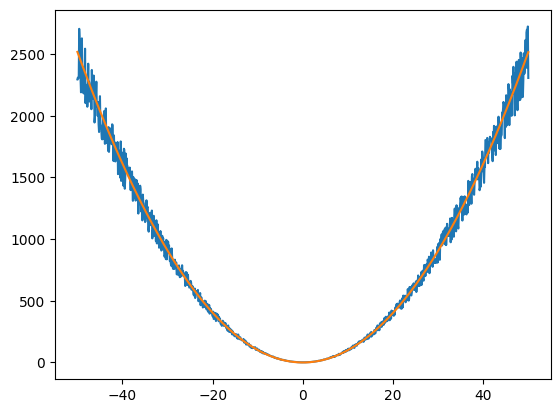

In [ ]:
plt.plot(xs, ys)
plt.plot(xs, preds)

# Домашнее Задание

### Моделирование
Обучить модель линейной регресии на всех фичах (категориальных+числовых).
Предварительно преобразовать категориальные фичи, заполнить пропуски, почистить высокоскореллированные фичи и тд.

Попробовать обучить lasso/ridge регрессии, оценить коэффициенты при регрессорах, описать есть ли ненужные фичи.

Замерить метрики MSE, R2 на train/test выборках

Со **здвёздочкой***: Дополнительно отобрать фичи таким образом, чтобы максимизировать качество модели на test выборке.

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import root_mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [443]:
df = pd.read_csv('./house_prices.csv')
df = df.drop('Id', axis=1)
target_col = 'SalePrice'
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [444]:
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

### Разделение фичей

In [445]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

In [446]:
df[numeric_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [447]:
df[categorical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

### Обработка фичей 

In [466]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('remove_outliers', QuantileTransformer(output_distribution='normal')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [467]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Очищаем от высокоскоррелированных фичкй

In [468]:
ohe = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = list(numeric_features) + list(cat_feature_names)

if hasattr(X_train_processed, "toarray"):  # если sparse — превращаем в dense
    X_dense = X_train_processed.toarray()
else:
    X_dense = X_train_processed

X_df = pd.DataFrame(X_dense, columns=all_feature_names)


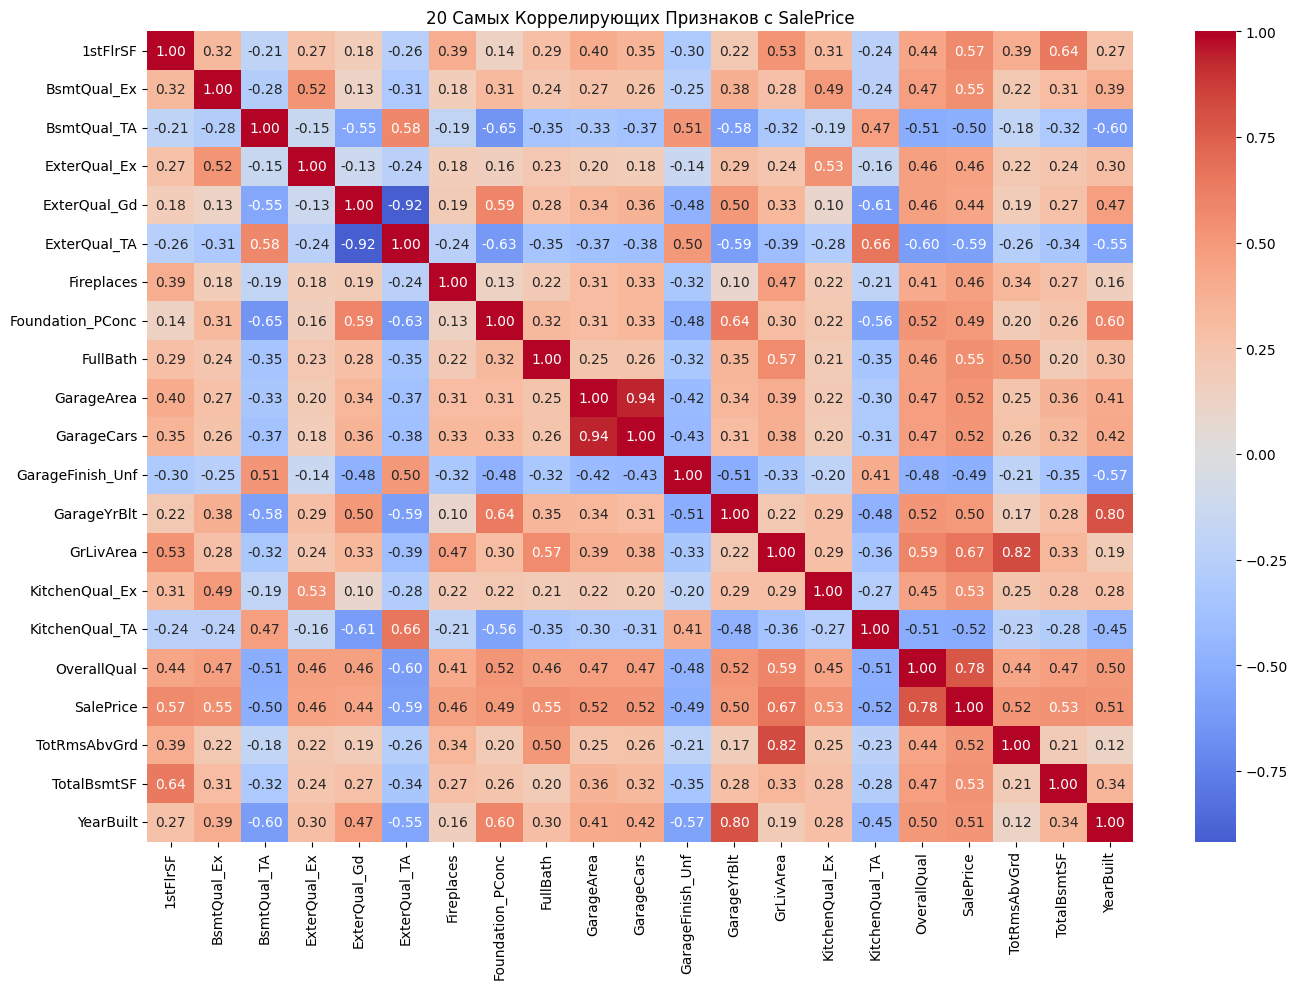

In [469]:
X_df[target_col] = y_train.reset_index(drop=True)

corr_matrix = X_df.corr(numeric_only=True)

top_corr = corr_matrix[target_col].abs().sort_values(ascending=False)[1:21].index  # [1:] исключаем SalePrice

top_corr_matrix = corr_matrix.loc[top_corr.union([target_col]), top_corr.union([target_col])]

plt.figure(figsize=(14, 10))
sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('20 Самых Коррелирующих Признаков с SalePrice')
plt.tight_layout()
plt.show()


In [470]:
corr_matrix = X_df.drop(columns=[target_col]).corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.9)]

print(f"{len(to_drop)} фич с высокой корреляцией: {to_drop}")


17 фич с высокой корреляцией: ['GarageArea', 'Street_Pave', 'Alley_Pave', 'LotShape_Reg', 'Utilities_NoSeWa', 'LandSlope_Mod', 'RoofStyle_Hip', 'Exterior2nd_CmentBd', 'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'MasVnrType_Stone', 'ExterQual_TA', 'BsmtFinType1_Unf', 'BsmtFinType2_Unf', 'CentralAir_Y', 'MiscFeature_TenC', 'SaleCondition_Partial']


In [471]:
X_features = X_df.drop(columns=[target_col])

corr_matrix = X_features.corr()

X_train_final = X_features.drop(columns=to_drop)

if hasattr(X_test_processed, "toarray"):
    X_test_dense = X_test_processed.toarray()
else:
    X_test_dense = X_test_processed

X_test_df = pd.DataFrame(X_test_dense, columns=all_feature_names)
X_test_final = X_test_df[X_train_final.columns]


### Строим модели

In [472]:
# Модели
linear_model = LinearRegression()

lasso_model = Lasso(random_state=43, max_iter=10000)

ridge_model = Ridge(random_state=43)

### Замеры метрик

In [473]:
models = {
    'Linear Regression': linear_model,
    'Lasso Regression': lasso_model,
    'Ridge Regression': ridge_model
}

results = {}

for name, model in models.items():
    model.fit(X_train_final, y_train)
    
    y_train_pred = model.predict(X_train_final)
    y_test_pred = model.predict(X_test_final)
    
    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R2': train_r2,
        'Test R2': test_r2
    }

results_df = pd.DataFrame(results).T
print(results_df)


                     Train RMSE     Test RMSE  Train R2   Test R2
Linear Regression  20592.544564  30808.939013  0.930846  0.858620
Lasso Regression   20595.639206  30720.757433  0.930825  0.859428
Ridge Regression   21788.204579  31078.140536  0.922582  0.856139


### Оценка коэффициентов

In [474]:
ridge_model.fit(X_train_final, y_train)

coefs = ridge_model.coef_

final_feature_names = X_train_final.columns

coef_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

# 4. Выводим
print(coef_df)
print()
print("Коэффициенты с малой значимостью:")
print(coef_df[coef_df['Coefficient'].abs() < 0.01])

                  Feature    Coefficient
113      RoofMatl_ClyTile -140228.032321
119      RoofMatl_WdShngl   90575.913524
236             PoolQC_Ex   62193.509266
238             PoolQC_Gd  -42297.153007
72   Neighborhood_NoRidge   40529.224287
..                    ...            ...
257  SaleCondition_Family    -172.776418
195      Electrical_FuseF     165.010510
199        KitchenQual_Fa    -136.229288
21           KitchenAbvGr     -90.572472
41             Alley_Grvl     -82.493407

[259 rows x 2 columns]

Коэффициенты с малой значимостью:
Empty DataFrame
Columns: [Feature, Coefficient]
Index: []


In [475]:
# Обучаем модель
lasso_model.fit(X_train_final, y_train)

# Получаем коэффициенты модели
coefs = lasso_model.coef_

# Создаем список всех признаков
final_feature_names = X_train_final.columns

# Собираем DataFrame с признаками и их коэффициентами
lasso_coef_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': coefs
})

# Фильтруем признаки с ненулевыми коэффициентами (используемые)
used_features = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]['Feature'].tolist()
print(f'Оставлено признаков: {len(used_features)} из {len(final_feature_names)}')

# Фичи с нулевыми коэффициентами (ненужные)
print('-'*50)
print('Неиспользуемые признаки:')
print(lasso_coef_df[lasso_coef_df['Coefficient'] == 0]['Feature'])


Оставлено признаков: 237 из 259
--------------------------------------------------
Неиспользуемые признаки:
36             MSZoning_FV
50        LotConfig_Corner
66     Neighborhood_IDOTRR
85         Condition1_PosA
94         Condition2_PosA
99          BldgType_Twnhs
108        HouseStyle_SLvl
117       RoofMatl_Tar&Grv
120    Exterior1st_AsbShng
122    Exterior1st_BrkComm
124    Exterior1st_CemntBd
155           ExterCond_TA
166            BsmtCond_Fa
183           Heating_GasA
188           HeatingQC_Ex
203        Functional_Maj2
211         FireplaceQu_Gd
221       GarageFinish_RFn
227          GarageQual_TA
229          GarageCond_Fa
233           PavedDrive_N
238              PoolQC_Gd
Name: Feature, dtype: object


### Отбор фичей для максимизации качества модели на test выборке

In [476]:
# Перебор значений alpha для Lasso
alphas = [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 200.0, 300.0, 500.0, 800.0, 1000.0]
metrics = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=43, max_iter=10000)
    lasso.fit(X_train_final, y_train)
    
    y_train_pred = lasso.predict(X_train_final)
    y_test_pred = lasso.predict(X_test_final)

    train_rmse = root_mean_squared_error(y_train, y_train_pred)
    test_rmse = root_mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    non_zero_features = np.sum(lasso.coef_ != 0)
    metrics.append({
        'alpha': alpha,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Used Features': non_zero_features
    })

# Вывод результатов
for metric in metrics:
    print(f"Alpha: {metric['alpha']:.1f}, Train RMSE: {metric['Train RMSE']:.4f}, Test RMSE: {metric['Test RMSE']:.4f}, Train R2: {metric['Train R2']:.4f}, Test R2: {metric['Test R2']:.4f}, Исплользовано фичей: {metric['Used Features']}")

# Поиск наилучшего R2 на тестовой выборке
best_metric = max(metrics, key=lambda x: x['Test R2'])

print("\nНаилучший результат:")
print(f"Alpha: {best_metric['alpha']:.1f}, Test R2: {best_metric['Test R2']:.4f}, Использовано фичей: {best_metric['Used Features']}")

Alpha: 0.1, Train RMSE: 20592.5783, Test RMSE: 30786.8880, Train R2: 0.9308, Test R2: 0.8588, Исплользовано фичей: 242
Alpha: 0.5, Train RMSE: 20593.3644, Test RMSE: 30755.1739, Train R2: 0.9308, Test R2: 0.8591, Исплользовано фичей: 237
Alpha: 1.0, Train RMSE: 20595.6392, Test RMSE: 30720.7574, Train R2: 0.9308, Test R2: 0.8594, Исплользовано фичей: 237
Alpha: 5.0, Train RMSE: 20655.7662, Test RMSE: 30511.5272, Train R2: 0.9304, Test R2: 0.8613, Исплользовано фичей: 221
Alpha: 10.0, Train RMSE: 20767.2166, Test RMSE: 30394.7833, Train R2: 0.9297, Test R2: 0.8624, Исплользовано фичей: 202
Alpha: 50.0, Train RMSE: 21811.4601, Test RMSE: 30056.7187, Train R2: 0.9224, Test R2: 0.8654, Исплользовано фичей: 149
Alpha: 100.0, Train RMSE: 22770.3457, Test RMSE: 29738.1359, Train R2: 0.9154, Test R2: 0.8683, Исплользовано фичей: 114
Alpha: 200.0, Train RMSE: 24928.7899, Test RMSE: 30010.8458, Train R2: 0.8987, Test R2: 0.8659, Исплользовано фичей: 78
Alpha: 300.0, Train RMSE: 27114.6098, Test 